In [1]:
import pandas as pd                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [2]:
dataset = pd.read_csv('lung cancer dataset (updated).csv')

# **Some Visualization**

In [ ]:
sns.countplot(data=dataset, x='Level')
plt.title('Level')
plt.show()

Text(0.5, 1.0, 'Result')

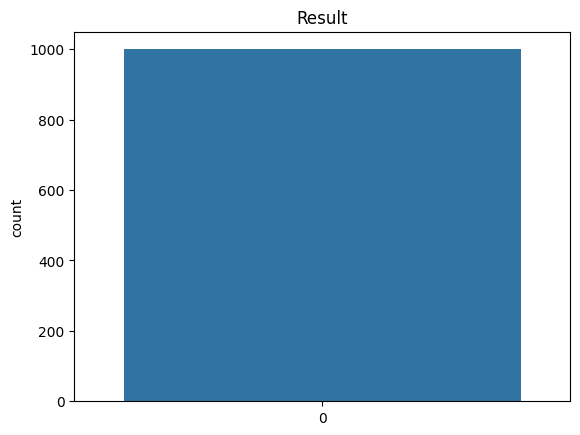

In [3]:
sns.countplot(dataset['Result'])
plt.title('Result')

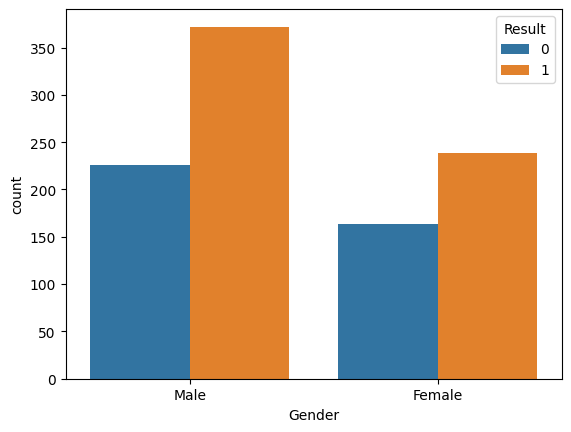

In [4]:
g1 = sns.countplot(x="Gender", hue="Result",data = dataset)

<function matplotlib.pyplot.show(close=None, block=None)>

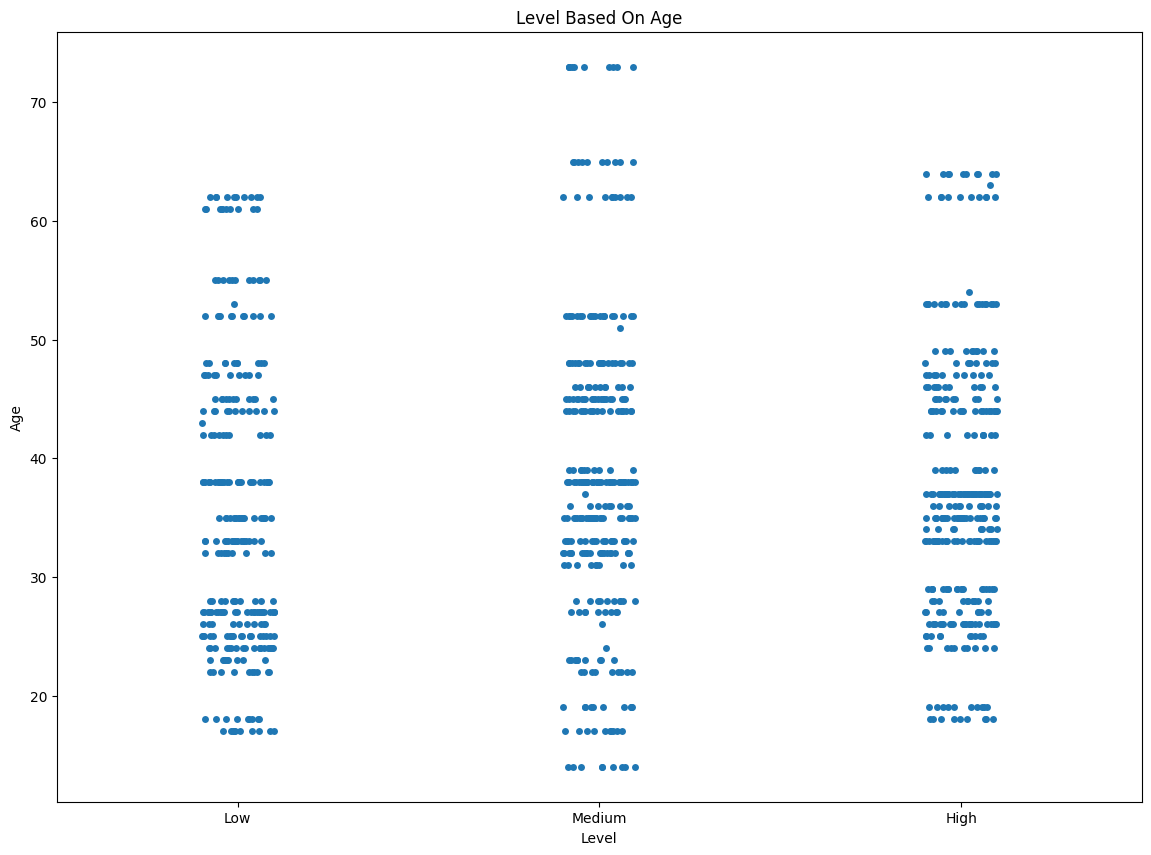

In [5]:
a4_dims = (14,10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.stripplot(x="Level", y="Age", data=dataset, jitter=True);
plt.title('Level Based On Age')
plt.show

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>], dtype=object)

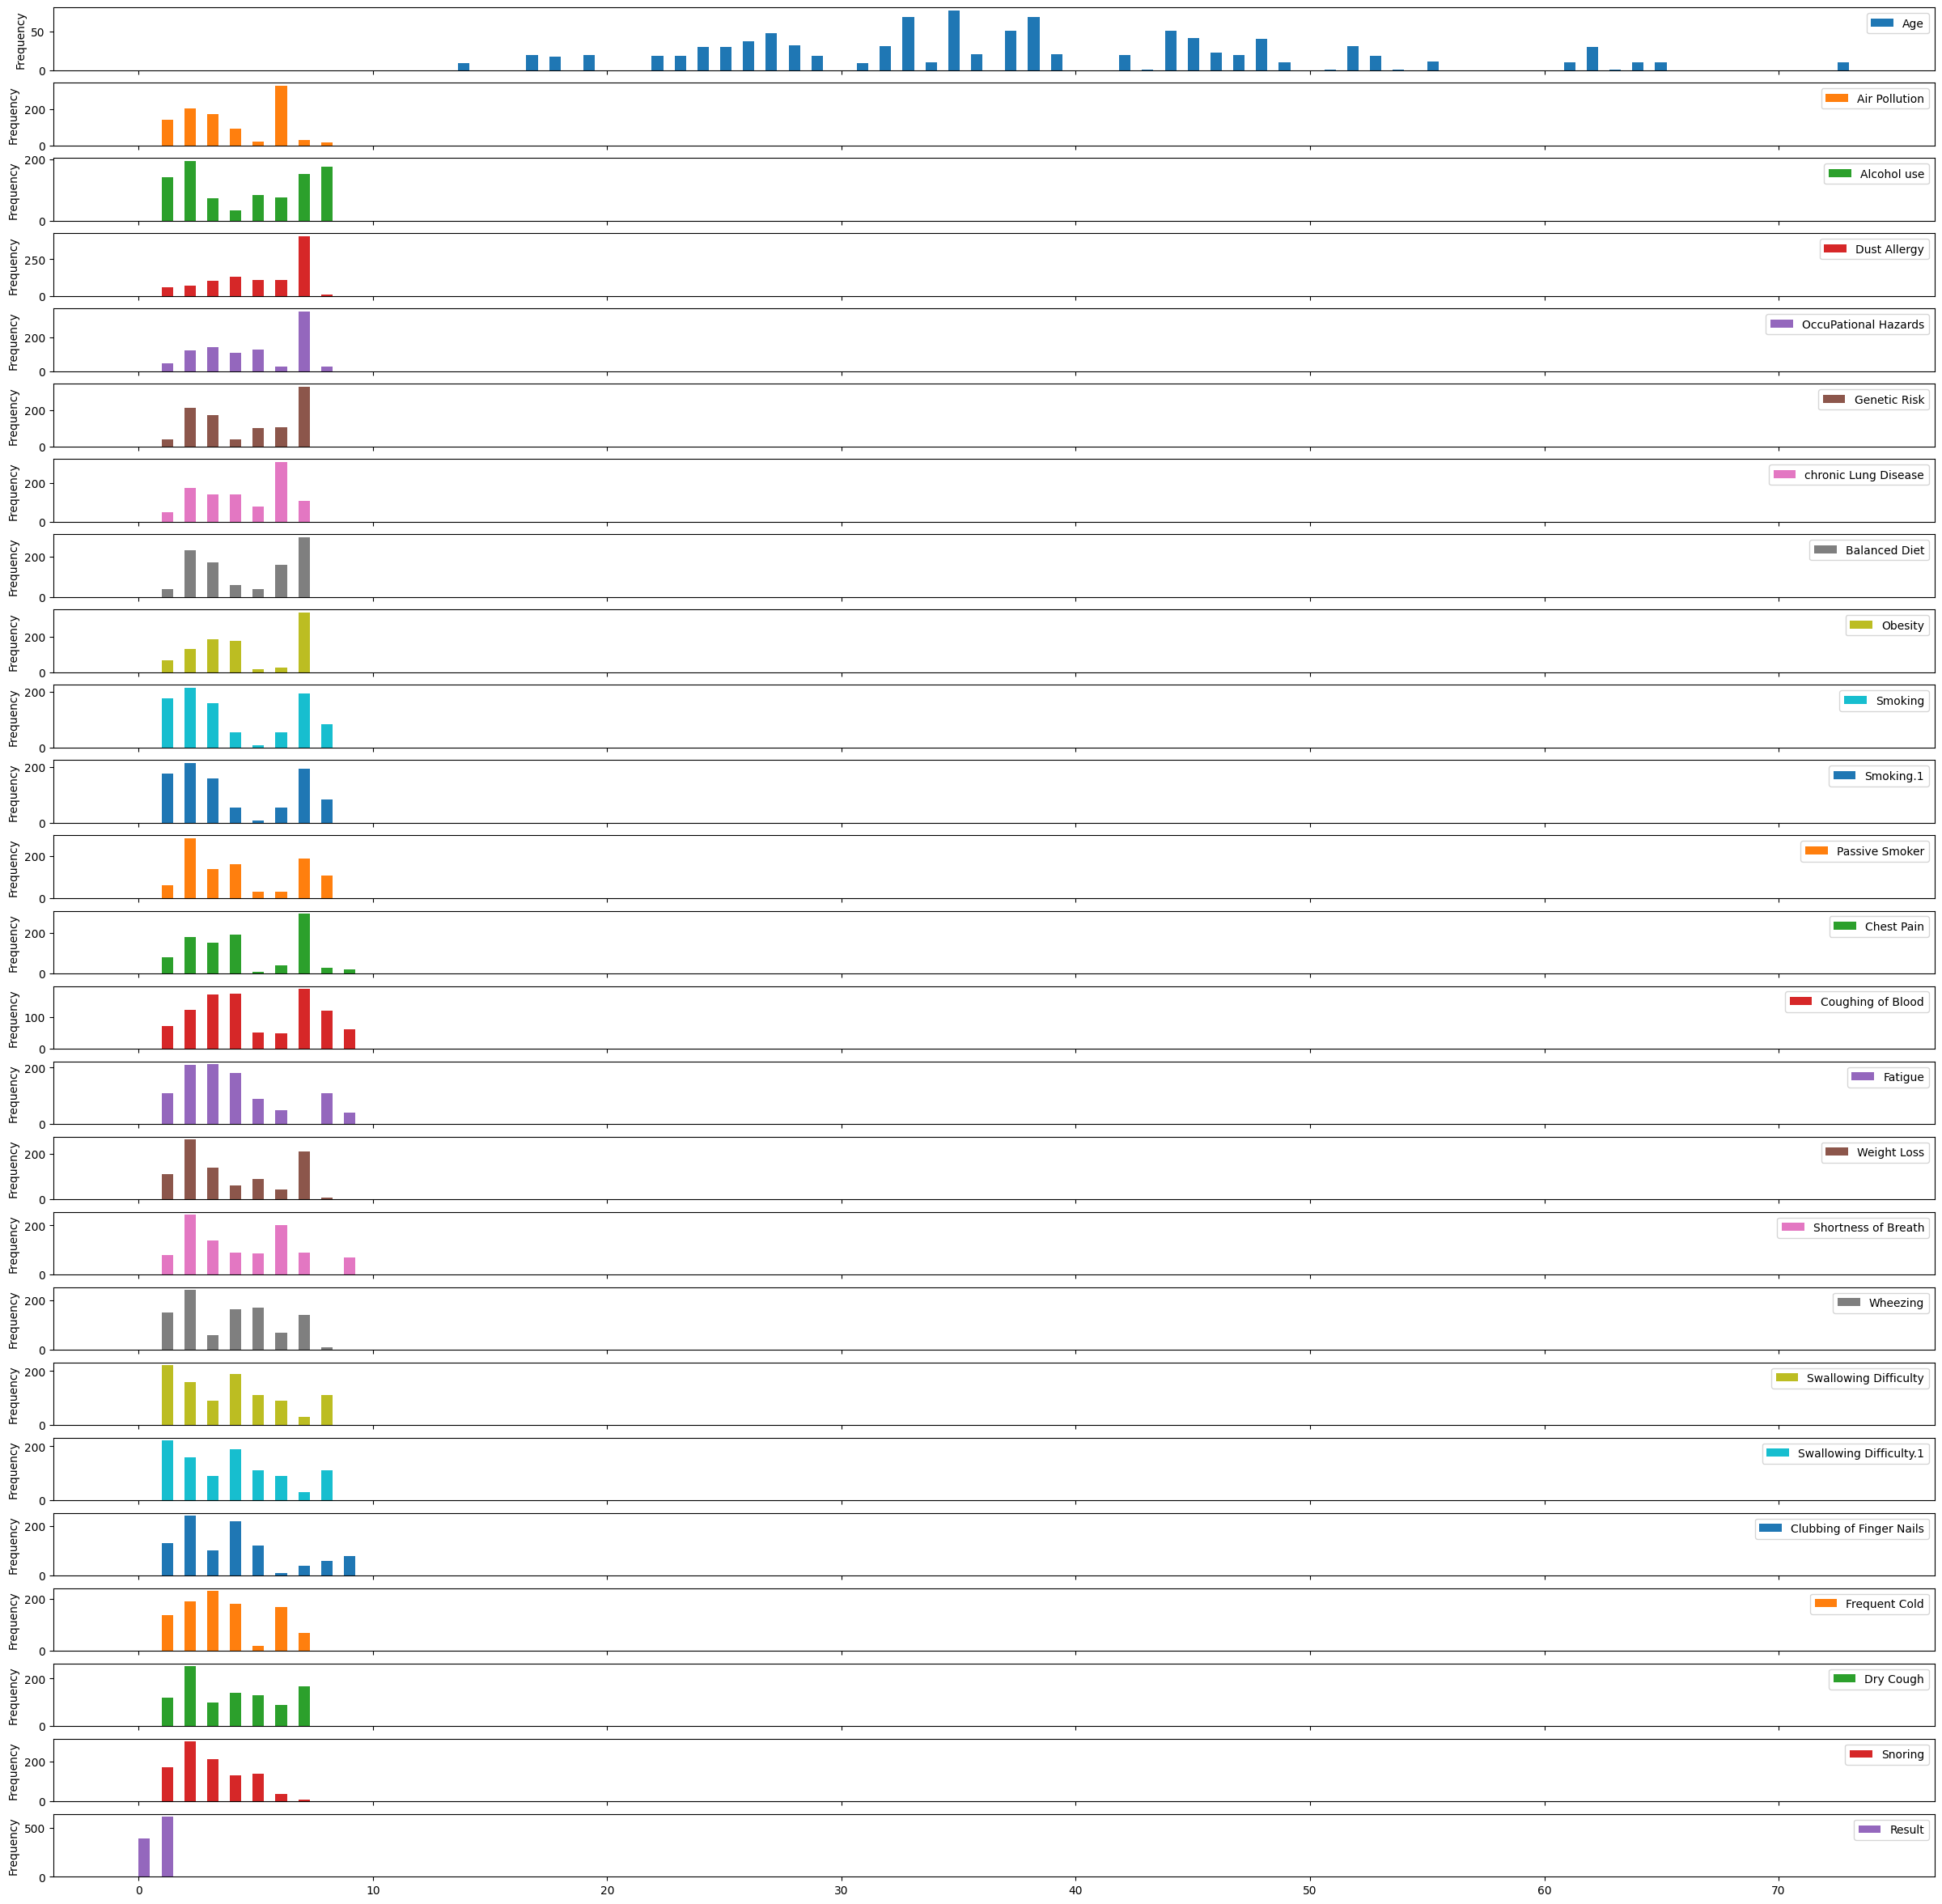

In [6]:
dataset.plot.hist(subplots=True,figsize=(30,30),bins=150)

### **PREPROCESSING DATASET**

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient Id                1000 non-null   object 
 1   Age                       1000 non-null   int64  
 2   Gender                    1000 non-null   object 
 3   Air Pollution             1000 non-null   int64  
 4   Alcohol use               936 non-null    float64
 5   Dust Allergy              1000 non-null   int64  
 6   OccuPational Hazards      950 non-null    float64
 7   Genetic Risk              1000 non-null   int64  
 8   chronic Lung Disease      1000 non-null   int64  
 9   Balanced Diet             1000 non-null   int64  
 10  Obesity                   936 non-null    float64
 11  Smoking                   944 non-null    float64
 12  Smoking.1                 944 non-null    float64
 13  Passive Smoker            1000 non-null   int64  
 14  Chest Pai

In [8]:
dataset.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Shortness of Breath,Wheezing,Swallowing Difficulty,Swallowing Difficulty.1,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level,Result
0,P1,33,Male,2,4.0,5,4.0,3,2,2,...,2,2,3,3,1,2,3,4,Low,1
1,P10,17,Male,3,1.0,5,3.0,4,2,2,...,7,8,6,6,2,1,7,2,Medium,0
2,P100,35,Male,4,5.0,6,5.0,5,4,6,...,9,2,1,1,4,6,7,2,High,1
3,P1000,37,Male,7,NaN,7,7.0,6,7,7,...,3,1,4,4,5,6,7,5,High,0
4,P101,46,Male,6,8.0,7,7.0,7,6,7,...,4,1,4,4,2,4,2,3,High,0


<Axes: >

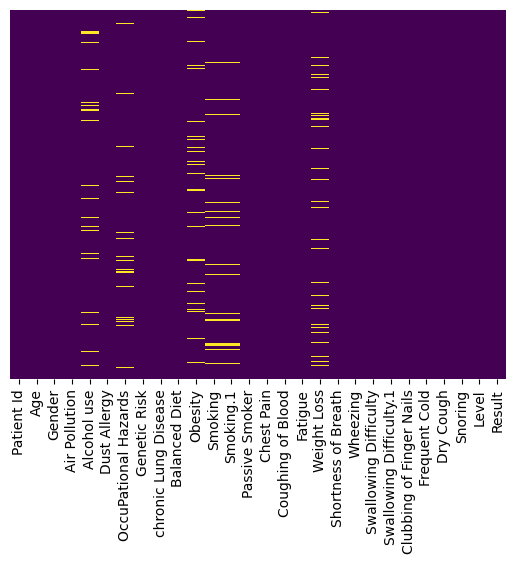

In [9]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**Dropping Columns**

We are going to be dropping the features 'Smoking' and 'Swallowing Difficulty' as they are duplicates. On top, we are also going to be dropping the 'Patient Id' column as it has zero effects on the result.

In [10]:
dataset = dataset.drop(['Patient Id','Smoking.1','Swallowing Difficulty.1'], axis = 1)


**Imputation for missing values**

Five columns seem to consist missing or null values. For them, we are going to replace them with the mean of all the values.

In [11]:
from sklearn.impute import SimpleImputer

#Alcohol use
impute = SimpleImputer(missing_values=np.nan, strategy='mean')
impute.fit(dataset[['Alcohol use']])
dataset['Alcohol use'] = impute.transform(dataset[['Alcohol use']])

#OccuPational Hazards 
impute = SimpleImputer(missing_values=np.nan, strategy='mean')
impute.fit(dataset[['OccuPational Hazards']])
dataset['OccuPational Hazards'] = impute.transform(dataset[['OccuPational Hazards']])

#Obesity
impute = SimpleImputer(missing_values=np.nan, strategy='mean')
impute.fit(dataset[['Obesity']])
dataset['Obesity'] = impute.transform(dataset[['Obesity']])

#Smoking
impute = SimpleImputer(missing_values=np.nan, strategy='mean')
impute.fit(dataset[['Smoking']])
dataset['Smoking'] = impute.transform(dataset[['Smoking']])

#Weight Loss
impute = SimpleImputer(missing_values=np.nan, strategy='mean')
impute.fit(dataset[['Weight Loss']])
dataset['Weight Loss'] = impute.transform(dataset[['Weight Loss']])


**Handling Categorical Features**

Our dataset only has two categorical features which are 'Level' and 'Gender'. We are going to replace them with integer values like so.

For 'Levels':
Low : 0
Medium : 1
High : 2

For 'Gender':
Male : 0
Female : 1

In [12]:
dataset['Level'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [13]:
dataset['Level'] = dataset['Level'].map({'Low':0,'Medium':1,'High':2}) 

In [14]:
dataset['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [15]:
dataset['Gender'] = dataset['Gender'].map({'Male':0,'Female':1}) 

**Correlation** (WORK IN PROGRESS)

In [16]:
data=dataset.corr()
data

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level,Result
Age,1.000000,-0.202086,0.099494,0.143145,0.035202,0.064949,0.073151,0.128952,0.004863,0.031502,...,0.103122,0.035329,-0.095354,-0.105833,0.039258,-0.012706,0.012128,-0.004700,0.060048,0.036527
Gender,-0.202086,1.000000,-0.246912,-0.212776,-0.204312,-0.190913,-0.222727,-0.205061,-0.099741,-0.128184,...,-0.045738,-0.045972,-0.076304,-0.058324,-0.034219,-0.000526,-0.123001,-0.181618,-0.164985,-0.027703
Air Pollution,0.099494,-0.246912,1.000000,0.724167,0.637503,0.596790,0.705276,0.626701,0.524873,0.586698,...,0.233637,0.269558,0.055368,-0.080918,0.241065,0.174539,0.261489,-0.021343,0.636038,0.009865
Alcohol use,0.143145,-0.212776,0.724167,1.000000,0.793018,0.824641,0.851195,0.731560,0.629113,0.625053,...,0.189521,0.427765,0.174649,-0.110343,0.406099,0.170714,0.208486,0.110865,0.693379,-0.002658
Dust Allergy,0.035202,-0.204312,0.637503,0.793018,1.000000,0.813751,0.787904,0.619556,0.647197,0.678862,...,0.301724,0.518682,0.304850,0.031141,0.345714,0.219389,0.300195,0.052844,0.713839,0.014696
OccuPational Hazards,0.064949,-0.190913,0.596790,0.824641,0.813751,1.000000,0.867532,0.833280,0.669141,0.675801,...,0.160103,0.354951,0.181755,-0.002528,0.359603,0.072263,0.156654,0.011955,0.651422,-0.003407
Genetic Risk,0.073151,-0.222727,0.705276,0.851195,0.787904,0.867532,1.000000,0.836231,0.679905,0.714717,...,0.251030,0.458200,0.204973,-0.062948,0.357815,0.087092,0.194399,-0.056831,0.701303,-0.015804
chronic Lung Disease,0.128952,-0.205061,0.626701,0.731560,0.619556,0.833280,0.836231,1.000000,0.622632,0.584101,...,0.087287,0.182426,0.057214,0.007279,0.298023,0.028759,0.114161,0.043375,0.609971,-0.026844
Balanced Diet,0.004863,-0.099741,0.524873,0.629113,0.647197,0.669141,0.679905,0.622632,1.000000,0.681213,...,-0.001035,0.343623,0.063930,0.046807,0.041967,0.263931,0.331995,0.152677,0.706273,-0.039401
Obesity,0.031502,-0.128184,0.586698,0.625053,0.678862,0.675801,0.714717,0.584101,0.681213,1.000000,...,0.287381,0.385274,0.103349,0.131815,0.133342,0.268893,0.174696,0.038693,0.804828,0.004354


<Axes: >

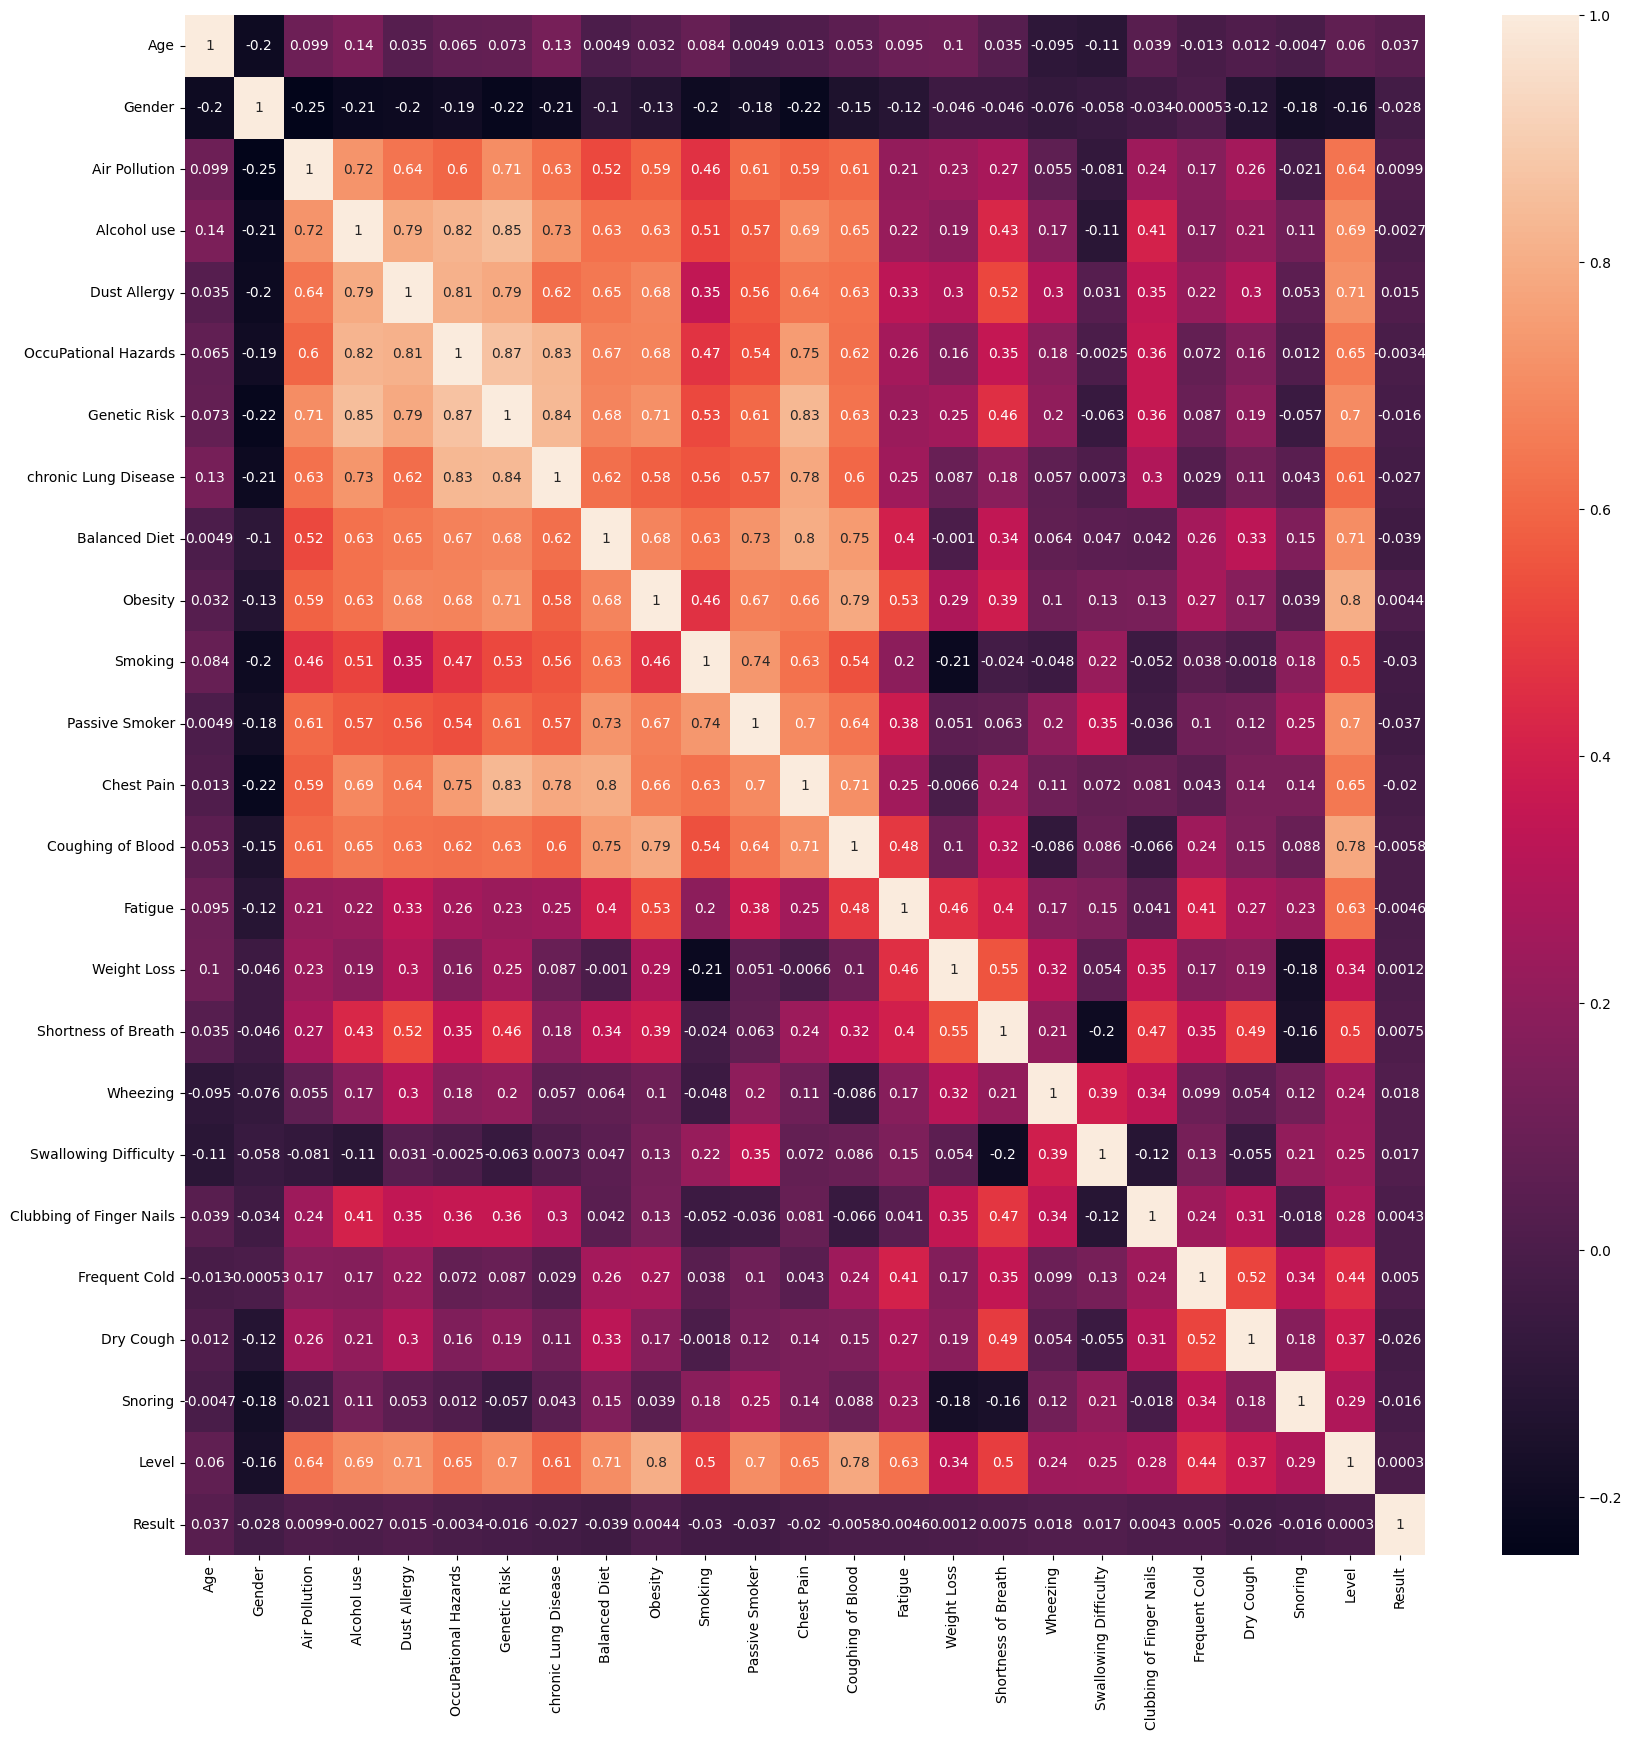

In [17]:
data.style.background_gradient(cmap="coolwarm")
plt.figure(figsize=(20,20))
sns.heatmap(data, annot=True)

In [18]:
dropcolumn = ["Genetic Risk","OccuPational Hazards"]
newdata=dataset.drop(dropcolumn, axis=1)
newdata.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,...,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level,Result
0,33,0,2,4.000000,5,2,2,4.000000,3.0,2,...,4.0,2,2,3,1,2,3,4,0,1
1,17,0,3,1.000000,5,2,2,4.449786,2.0,4,...,3.0,7,8,6,2,1,7,2,1,0
2,35,0,4,5.000000,6,4,6,4.449786,2.0,3,...,7.0,9,2,1,4,6,7,2,2,1
3,37,0,7,4.541667,7,7,7,7.000000,7.0,7,...,2.0,3,1,4,5,6,7,5,2,0
4,46,0,6,8.000000,7,6,7,7.000000,8.0,7,...,2.0,4,1,4,2,4,2,3,2,0


**PREPARING TRAINING AND TEST DATASETS WITH BOTH UNSCALED AND SCALED VARIANTS**

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

dataset_features = newdata.drop(['Result'],axis=1)
dataset_label = newdata['Result']

X_train, X_test, Y_train, Y_test = train_test_split(dataset_features, dataset_label, random_state=1)


#SCALED DATASETS
scaler = MinMaxScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaler.fit(X_test)
scaled_X_test = scaler.transform(X_test)

In [20]:
print("x_train shape: ", X_train.shape)
print("x_test shape: ", X_test.shape)
print("y_train shape: ", Y_train.shape)
print("y_test shape: ", Y_test.shape)
print("Number of classes ", len(np.unique(Y_train)))

x_train shape:  (750, 22)
x_test shape:  (250, 22)
y_train shape:  (750,)
y_test shape:  (250,)
Number of classes  2


**DECISION TREE**

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

clf = DecisionTreeClassifier()

clf = clf.fit(X_train,Y_train)

y_pred = clf.predict(X_train)
print("Without Scaling Training accuracy of the model is",metrics.accuracy_score(Y_train, y_pred))
y_pred = clf.predict(X_test)
print("Without Scaling Testing accuracy of the model is",metrics.accuracy_score(Y_test, y_pred))

clf = DecisionTreeClassifier()

clf = clf.fit(scaled_X_train,Y_train)

y_pred = clf.predict(scaled_X_train)
print("With Scaling Training accuracy of the model is",metrics.accuracy_score(Y_train, y_pred))
y_pred = clf.predict(scaled_X_test)
print("With Scaling Testing accuracy of the model is",metrics.accuracy_score(Y_test, y_pred))



Without Scaling Training accuracy of the model is 0.7453333333333333
Without Scaling Testing accuracy of the model is 0.492
With Scaling Training accuracy of the model is 0.7453333333333333
With Scaling Testing accuracy of the model is 0.544


In [22]:
predictions = clf.predict(scaled_X_test)
print(predictions)
from sklearn.metrics import classification_report,confusion_matrix
mat=confusion_matrix(predictions, Y_test)
print(mat)
print(classification_report(Y_test,predictions))


[1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0
 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1
 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1
 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0]
[[37 49]
 [65 99]]
              precision    recall  f1-score   support

           0       0.43      0.36      0.39       102
           1       0.60      0.67      0.63       148

    accuracy                           0.54       250
   macro avg       0.52      0.52      0.51       250
weighted avg       0.53      0.54      0.54       250



<Axes: >

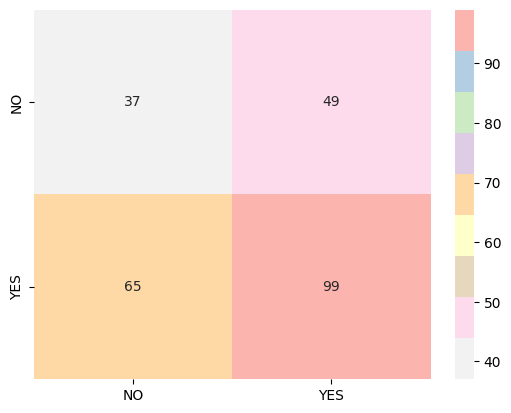

In [23]:
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", xticklabels=['NO' ,'YES' ], yticklabels=['NO' ,'YES'], annot=True)

**NAIVE BAYES**

In [24]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
print("Without Scaling Training accuracy of the model is {:.2f}".format(gnb.score(X_train, Y_train)))
print("Without Scaling Testing accuracy of the model is {:.2f}".format(gnb.score(X_test,Y_test)))

gnb.fit(scaled_X_train, Y_train)
print("With Scaling Training accuracy of the model is {:.2f}".format(gnb.score(scaled_X_train, Y_train)))
print("With Scaling Testing accuracy of the model is {:.2f}".format(gnb.score(scaled_X_test,Y_test)))

Without Scaling Training accuracy of the model is 0.60
Without Scaling Testing accuracy of the model is 0.57
With Scaling Training accuracy of the model is 0.60
With Scaling Testing accuracy of the model is 0.57


In [25]:
predictions = gnb.predict(scaled_X_test)
print(predictions)
from sklearn.metrics import classification_report,confusion_matrix
mat=confusion_matrix(predictions, Y_test)
print(mat)
print(classification_report(Y_test,predictions))

[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1]
[[ 18  24]
 [ 84 124]]
              precision    recall  f1-score   support

           0       0.43      0.18      0.25       102
           1       0.60      0.84      0.70       148

    accuracy                           0.57       250
   macro avg       0.51      0.51      0.47       250
weighted avg       0.53      0.57      0.51       250



<Axes: >

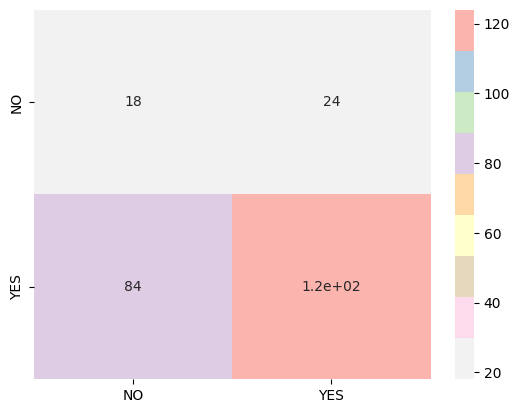

In [26]:
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", xticklabels=['NO' ,'YES' ], yticklabels=['NO' ,'YES'], annot=True)

**RANDOM FOREST**

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
rfc .fit(X_train, Y_train)
print("Without Scaling Training accuracy of the model is {:.2f}".format(rfc .score(X_train, Y_train)))
print("Without Scaling Testing accuracy of the model is {:.2f}".format(rfc .score(X_test, Y_test)))

rfc.fit(scaled_X_train, Y_train)
print("With Scaling Training accuracy of the model is {:.2f}".format(rfc.score(scaled_X_train, Y_train)))
print("With Scaling Testing accuracy of the model is {:.2f}".format(rfc.score(scaled_X_test, Y_test)))

Without Scaling Training accuracy of the model is 0.75
Without Scaling Testing accuracy of the model is 0.54
With Scaling Training accuracy of the model is 0.74
With Scaling Testing accuracy of the model is 0.55


In [28]:
predictions = rfc.predict(scaled_X_test)
print(predictions)
from sklearn.metrics import classification_report,confusion_matrix
mat=confusion_matrix(predictions, Y_test)
print(mat)
print(classification_report(Y_test,predictions))


[1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1]
[[ 16  26]
 [ 86 122]]
              precision    recall  f1-score   support

           0       0.38      0.16      0.22       102
           1       0.59      0.82      0.69       148

    accuracy                           0.55       250
   macro avg       0.48      0.49      0.45       250
weighted avg       0.50      0.55      0.50       250



<Axes: >

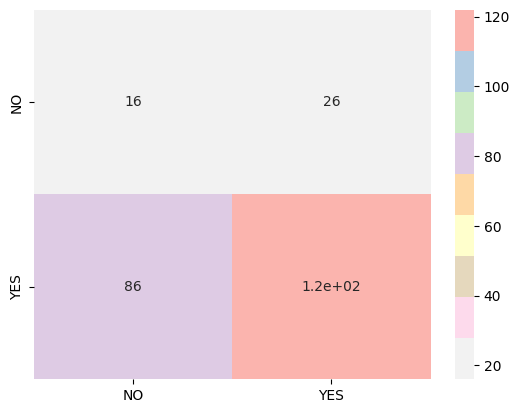

In [29]:
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", xticklabels=['NO' ,'YES' ], yticklabels=['NO' ,'YES'], annot=True)

**Support vector machine**


In [30]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,Y_train)
print("Training accuracy of the model is {:.2f}".format(model.score(X_train, Y_train)))
print("Testing accuracy of the model is {:.2f}".format(model.score(X_test, Y_test)))

Training accuracy of the model is 0.62
Testing accuracy of the model is 0.59


In [31]:
from sklearn.metrics import classification_report,confusion_matrix
predictions=model.predict(X_test)
print(confusion_matrix(Y_test,predictions))
print("\n")
print(classification_report(Y_test,predictions))

[[  0 102]
 [  0 148]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       102
           1       0.59      1.00      0.74       148

    accuracy                           0.59       250
   macro avg       0.30      0.50      0.37       250
weighted avg       0.35      0.59      0.44       250



C:\Users\shake\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shake\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shake\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

**Grid** **Search**

In [32]:
from sklearn.model_selection import GridSearchCV
param_grid ={"C":[0.1,1,10,100,1000],"gamma":[1,0.1,0.01,0.001,0.0001]}
grid= GridSearchCV(SVC(),param_grid,verbose=3)

grid.fit(X_train,Y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.613 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.613 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.620 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.620 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.620 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.613 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.613 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.620 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.620 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.620 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.613 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [33]:
grid.best_params_

{'C': 10, 'gamma': 0.001}

In [34]:
grid_predictions=grid.predict(X_test)

In [35]:
print(confusion_matrix(Y_test,grid_predictions))
print("\n")
print(classification_report(Y_test,grid_predictions))

[[  1 101]
 [  1 147]]


              precision    recall  f1-score   support

           0       0.50      0.01      0.02       102
           1       0.59      0.99      0.74       148

    accuracy                           0.59       250
   macro avg       0.55      0.50      0.38       250
weighted avg       0.55      0.59      0.45       250



In [36]:
from sklearn.svm import SVC
model = SVC()
model.fit(scaled_X_train,Y_train)
print("Training accuracy of the model is {:.2f}".format(model.score(scaled_X_train, Y_train)))
print("Testing accuracy of the model is {:.2f}".format(model.score(scaled_X_test, Y_test)))

Training accuracy of the model is 0.63
Testing accuracy of the model is 0.59


In [37]:
from sklearn.metrics import classification_report,confusion_matrix
predictions=model.predict(scaled_X_test)
print(predictions)
print(confusion_matrix(Y_test,predictions))
print("\n")
print(classification_report(Y_test,predictions))

[1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[  1 101]
 [  2 146]]


              precision    recall  f1-score   support

           0       0.33      0.01      0.02       102
           1       0.59      0.99      0.74       148

    accuracy                           0.59       250
   macro avg       0.46      0.50      0.38       250
weighted avg       0.49      0.59      0.45       250



In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

knn.fit(scaled_X_train, Y_train)

print("Test set accuracy: {:.2f}".format(knn.score(scaled_X_test, Y_test)))

Test set accuracy: 0.54


<Axes: >

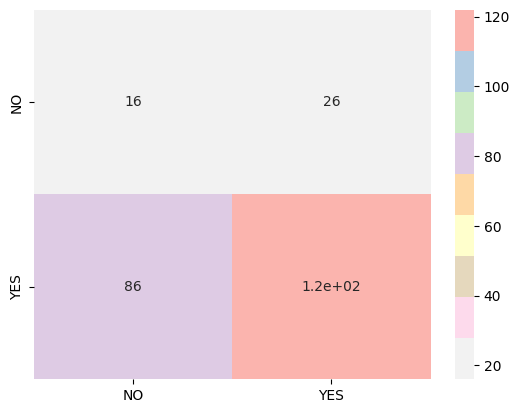

In [39]:
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", xticklabels=['NO' ,'YES' ], yticklabels=['NO' ,'YES'], annot=True)